In [ ]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
import pandas as pd
stock_df=pd.read_csv('MSFT.csv')
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060274,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062427,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063504,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061888,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060812,47894400
...,...,...,...,...,...,...,...
9515,2023-12-13,376.019989,377.640015,370.769989,374.369995,374.369995,30955500
9516,2023-12-14,373.309998,373.760010,364.130005,365.929993,365.929993,43277500
9517,2023-12-15,366.850006,372.399994,366.279999,370.730011,370.730011,78478200
9518,2023-12-18,369.450012,373.000000,368.679993,372.649994,372.649994,21802900


In [ ]:
!pip install yfinance hvplot mplcyberpunk -q

In [ ]:
import yfinance as yf
import pandas as pd
import pandas as pd
import numpy as np
import hvplot.pandas

import mplcyberpunk
from matplotlib import style
style.use('cyberpunk')

import matplotlib.pyplot as plt
import seaborn

In [ ]:
ticker = 'MSFT'

In [ ]:
yf_ticker = yf.Ticker(ticker)

In [ ]:
full_name_of_ticker = yf_ticker.info['longName']
full_name_of_ticker

'Microsoft Corporation'

In [ ]:
stock = yf.Ticker(ticker)

stock_historical_prices = stock.history(period="10y")

stock_historical_prices.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-03-21 00:00:00-04:00,34.481891,34.668186,33.880657,34.007679,80721800,0.0,0.0
2014-03-24 00:00:00-04:00,34.160101,34.414142,33.753635,34.295589,46098400,0.0,0.0
2014-03-25 00:00:00-04:00,34.431076,34.710523,33.838312,34.160099,43193100,0.0,0.0
2014-03-26 00:00:00-04:00,34.278661,34.473425,33.533471,33.694366,41977500,0.0,0.0
2014-03-27 00:00:00-04:00,33.652029,33.846794,33.313306,33.330242,35369200,0.0,0.0


In [ ]:
stock_closing_prices_df = stock_historical_prices[[ 'Close']]

stock_closing_prices_df.head()

,Close
Date,
2014-03-21 00:00:00-04:00,34.007679
2014-03-24 00:00:00-04:00,34.295589
2014-03-25 00:00:00-04:00,34.160099
2014-03-26 00:00:00-04:00,33.694366
2014-03-27 00:00:00-04:00,33.330242


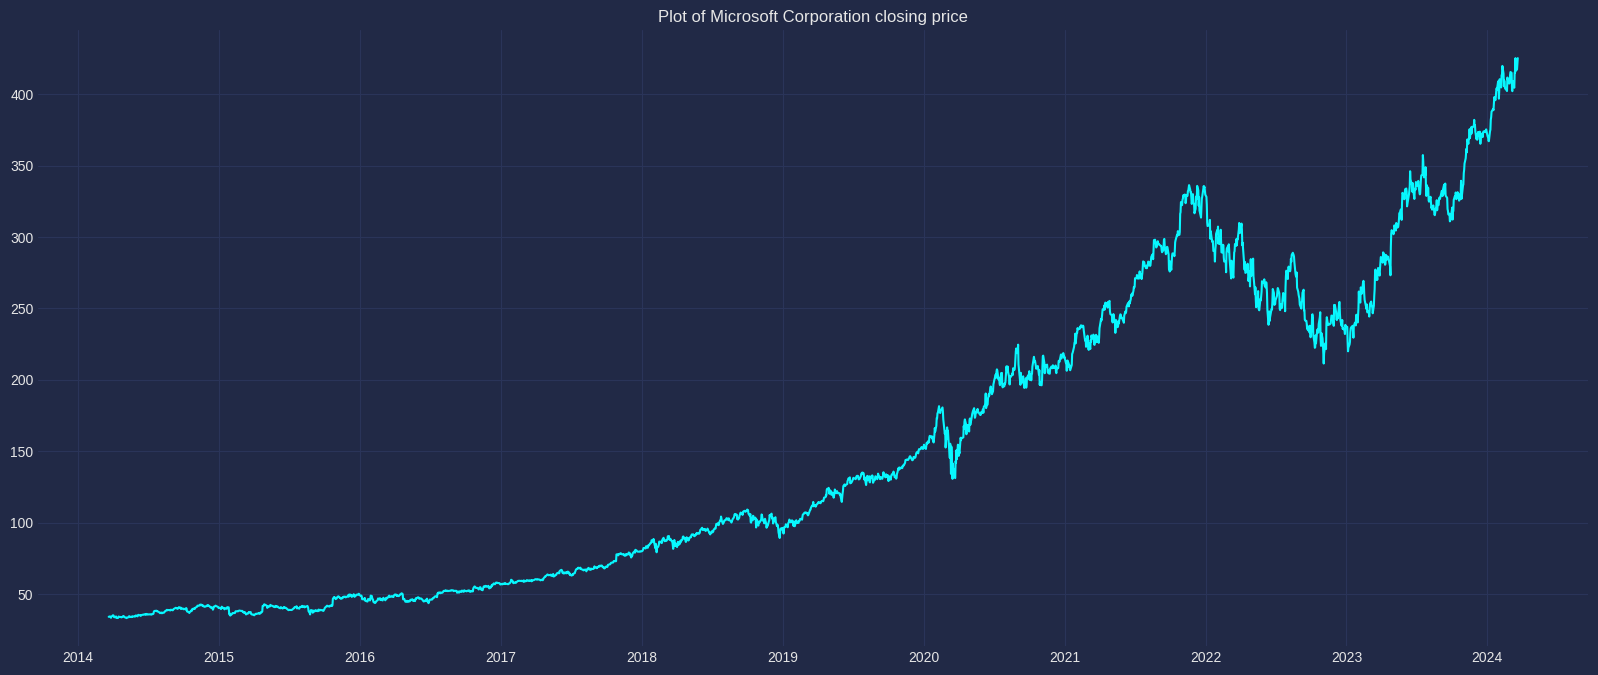

In [ ]:
plt.figure(figsize=(20, 8))

plt.plot(stock_closing_prices_df)

plt.title(f'Plot of {full_name_of_ticker} closing price')

plt.show()

In [ ]:
stock_1_year = yf.Ticker(ticker)

stock_historical_prices_1_year = stock_1_year.history(period="1y")

stock_closing_prices_df_1_year = stock_historical_prices_1_year[[ 'Close']]

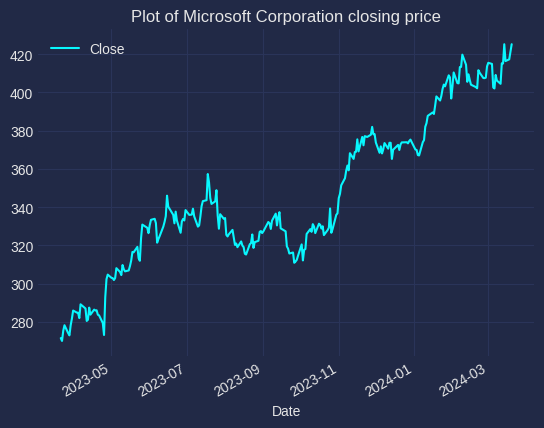

In [ ]:
stock_closing_prices_df_1_year.plot()

plt.title(f'Plot of {full_name_of_ticker} closing price')

plt.show()